# PREAMBLE

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from datetime import datetime as dt
codebase_path = os.path.abspath('..')
sys.path.append(codebase_path)
sys.path.append('.')
import xgboost as xgb
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split

## PATHS
modeling_set_path = './data/modeling_set.pkl'

from data_utils import *
from modeling_utils import *
constructor = construct_features()


# LOAD TRAINING DATA

In [2]:
modeling_set= pd.read_pickle(modeling_set_path)
X, y= constructor.training_arrays(modeling_set)
X.shape, y.shape

((792, 323), (792,))

# RUN CV PROCEDURE
Runnig a Repeated nested CV with k = 4 folds, repeated 10 times.

In [13]:
# init_params= {'objective': 'binary:logistic', 'learning_rate': 0.3, 'gamma': 1, 'max_depth': 6,
#               'subsample': 0.5, 'colsample': 0.5, 'reg_lambda': 1,
#               'n_estimators': 10, 'eval_metric':['auc','aucpr']}

# alt_space = {'learning_rate': lr_dist,
#                 'n_estimators': est_dist,
#                'max_depth':  np.random.choice(np.arange(2,7), size = 5, replace = False),
#                'subsample': subsample_dist,
#                'colsample_bytree': colrow_dist,
#                 'reg_lambda': np.random.choice(np.arange(2,20), size = 15, replace = False),
#                 'reg_alpha': np.random.choice(np.arange(2,20), size = 15, replace = False),
#                 'min_child_weight': minchild_dist,
#                 'gamma': np.random.choice(np.arange(2,25), size = 15, replace = False)
#                }

inner_cv= RepeatedKFold(n_repeats= 10, n_splits= 4, random_state= 500)
outer_cv= RepeatedKFold(n_repeats= 10, n_splits= 4, random_state= 500)
modeler= dev_xgb(inner_cv= inner_cv, outer_cv= outer_cv, n_jobs= -1)

In [ ]:
X, y= constructor.training_arrays(modeling_set)
cv_results_1 = modeler.cross_val(X, y, n_candids= 100)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 45.3min finished


In [ ]:
cv_results_1

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
38,95.069059,0.005002,HalvingRandomSearchCV(cv=RepeatedKFold(n_repea...,0.930117,0.934019,0.948791,0.941250
35,118.644123,0.004999,HalvingRandomSearchCV(cv=RepeatedKFold(n_repea...,0.921965,0.921658,0.937308,0.927083
32,114.511439,0.004999,HalvingRandomSearchCV(cv=RepeatedKFold(n_repea...,0.919520,0.938399,0.936524,0.943966
5,115.579146,0.005003,HalvingRandomSearchCV(cv=RepeatedKFold(n_repea...,0.907278,0.930790,0.935708,0.931179
28,118.736821,0.005007,HalvingRandomSearchCV(cv=RepeatedKFold(n_repea...,0.912396,0.931277,0.935595,0.935807
14,119.716021,0.004997,HalvingRandomSearchCV(cv=RepeatedKFold(n_repea...,0.921002,0.931952,0.933322,0.941767
27,116.027457,0.004999,HalvingRandomSearchCV(cv=RepeatedKFold(n_repea...,0.915366,0.937356,0.930892,0.943398
0,103.703692,0.004999,HalvingRandomSearchCV(cv=RepeatedKFold(n_repea...,0.909147,0.924296,0.925977,0.934772
36,114.578032,0.005003,HalvingRandomSearchCV(cv=RepeatedKFold(n_repea...,0.911548,0.944039,0.925214,0.947416
21,118.533057,0.004998,HalvingRandomSearchCV(cv=RepeatedKFold(n_repea...,0.894856,0.936689,0.924572,0.940575


In [3]:
# cv_results_1.to_pickle('./models/rand_cv_results.pkl')
cv_results_1 = pd.read_pickle('./models/rand_cv_results.pkl')

### SAVING THE BEST ESTIMATOR

In [8]:
rand_est = cv_results_1.iloc[0]['estimator'].best_estimator_
best_params = rand_est.get_xgb_params()
rand_est

XGBClassifier(base_score=0.5, booster=None, colsample=0.5, colsample_bylevel=1,
              colsample_bynode=1, colsample_bysplit=0.3395874835336988,
              colsample_bytree=0.5397260195471832, early_stopping=5,
              eval_metric=['auc', 'aucpr'], gamma=6.827240181212215, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.06853966341765598, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=1, random_state=606,
              reg_alpha=3.691981158348254, reg_lambda=4.309957666201089,
              scale_pos_weight=1, subsample=0.4814711766141261,
              tree_method=None, validate_parameters=False, verbosity=1)

In [ ]:
# with open ('./models/rand_est.pkl', 'wb') as f:
#     pickle.dump(rand_est, f)

# PLOTTING MODEL PERFORMACE
Plot of the CV score estimation over 40 CV iterations.

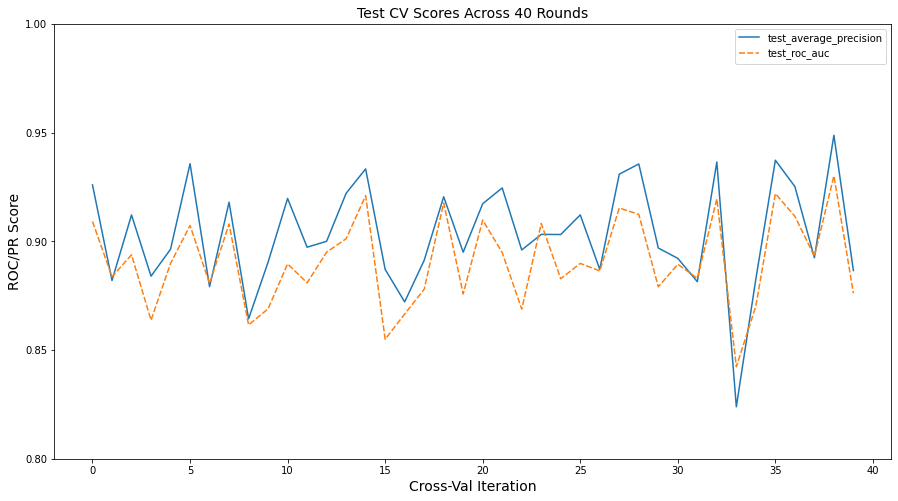

In [35]:
fig, ax0 = plt.subplots(1, 1, figsize = (15,8))
ax0 = sns.lineplot(data=  cv_results_1[['test_average_precision', 'test_roc_auc']] , legend= 'full')
ax0.set_yticks(np.linspace(.8, 1, 5))
ax0.set_xlabel('Cross-Val Iteration', fontsize = 14)
ax0.set_ylabel('ROC/PR Score', fontsize = 14)
ax0.set_title('Test CV Scores Across 40 Rounds', fontsize = 14)
plt.show()

#### MEAN RANDOM ESTIMATOR'S SCORES

TEST_AUCPR | 0.904 SD: 0.025 |TEST_AUCROC 0.891 SD: 0.021
TRAIN_AUCPR| 0.941 SD: 0.006 |TRAIN_AUCROC 0.934 SD: 0.007


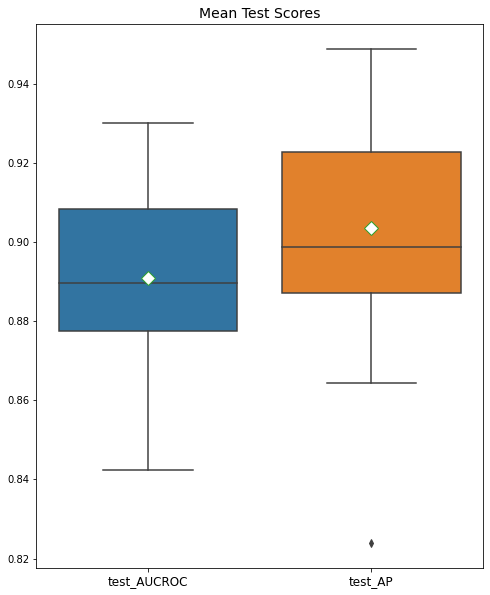

In [63]:
print('TEST_AUCPR |', cv_results_1.test_average_precision.mean().round(3), 'SD:', cv_results_1.test_average_precision.std().round(3),
      '|TEST_AUCROC', cv_results_1.test_roc_auc.mean().round(3), 'SD:', cv_results_1.test_roc_auc.std().round(3) )

print('TRAIN_AUCPR|', cv_results_1.train_average_precision.mean().round(3), 'SD:', cv_results_1.train_average_precision.std().round(3),
      '|TRAIN_AUCROC', cv_results_1.train_roc_auc.mean().round(3), 'SD:', cv_results_1.train_roc_auc.std().round(3) )

fig, ax0 = plt.subplots(1, 1, figsize = (8,10))
sns.boxplot(data = cv_results_1[['test_roc_auc', 'test_average_precision']], showmeans=True, meanprops ={'marker':'D',
                                                                                                        "markerfacecolor": "white",
                                                                                                        'markersize': '10'}, ax = ax0)
ax0.set_title('Mean Test Scores', fontsize = 14)
ax0.set_xticklabels(['test_AUCROC', 'test_AP'], fontsize = 12)
plt.show()

#### TEST VS TRAIN SCORES

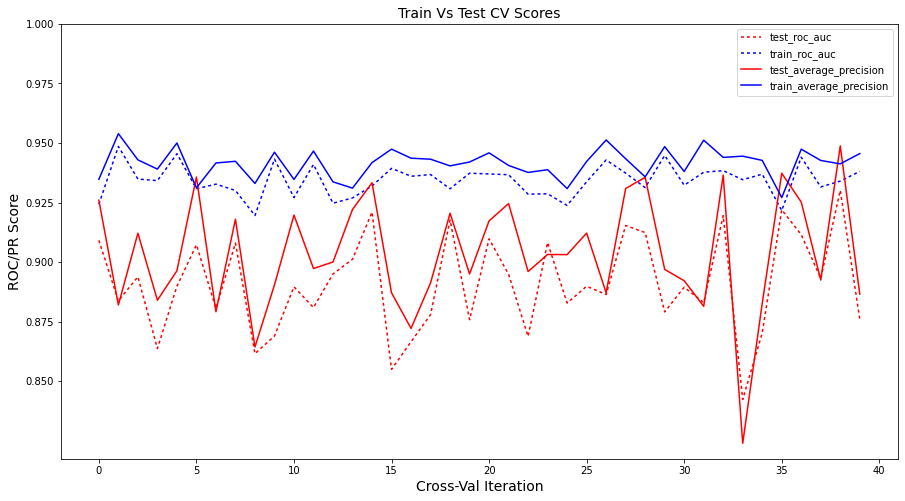

In [18]:

fig, ax0 = plt.subplots(1, 1, figsize = (15,8))
ax0 = sns.lineplot(data=  cv_results_1.iloc[:, 3:] , legend= 'full', palette = ['r', 'b', 'r', 'b'], dashes= [(2,2), (2,2), '', ''])
ax0.set_yticks(np.linspace(.85, 1, 7))
ax0.set_xlabel('Cross-Val Iteration', fontsize = 14)
ax0.set_ylabel('ROC/PR Score', fontsize = 14)
ax0.set_title('Train Vs Test CV Scores', fontsize = 14)
plt.show()

### PLOTTING ROC/PR CURVES OVER A DEFINED TEST SET

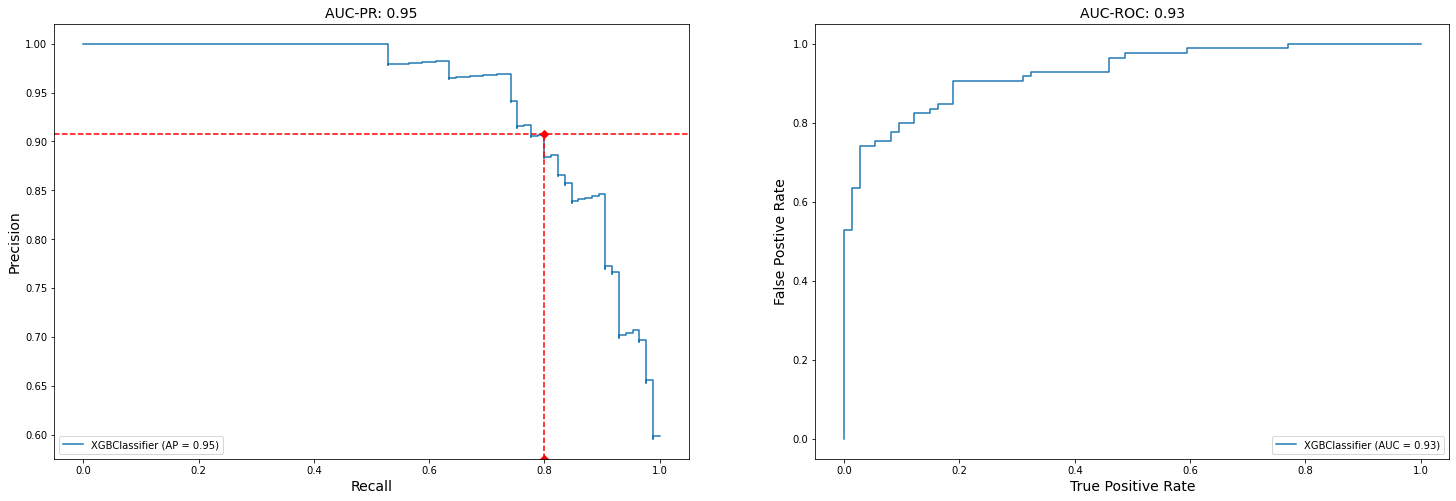

In [24]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.2, random_state= 606, shuffle= True)
fit_plot = rand_est.fit(xtrain, ytrain, early_stopping_rounds= 5, verbose= 0,  eval_metric= 'auc', eval_set = [(xtrain, ytrain)])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (25,8))
aucpr = PrecisionRecallDisplay.from_estimator(fit_plot, xtest, ytest, ax = ax0)
rocauc = RocCurveDisplay.from_estimator(fit_plot, xtest, ytest, ax = ax1)
ax0.axhline(0.908, 0, 1, ls = '--', color = 'r')
ax0.axvline(0.8,0, 0.746, ls = '--', color = 'r', marker = 'D')
ax0.set_xlabel('Recall', fontsize = 14)
ax0.set_ylabel('Precision', fontsize = 14)
ax0.set_title('AUC-PR: 0.95', fontsize = 14)
ax1.set_title('AUC-ROC: 0.93', fontsize = 14)
ax1.set_xlabel('True Positive Rate', fontsize = 14)
ax1.set_ylabel('False Postive Rate', fontsize = 14)
plt.show()